In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  # also improves the look of plots
sns.set()
plt.rcParams['figure.figsize'] = 10, 5  # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1  # to fix issue with seaborn box plots; needed after import seaborn

from sklearn.linear_model import LinearRegression  # for linear regression
from sklearn.cluster import KMeans  # for clustering
from sklearn.tree import DecisionTreeClassifier  # for decision tree mining
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

from IPython.display import HTML
HTML("<style>.h,.c{display:none}.t{color:#296eaa}.t:active+.h{display:block;}</style>")

df_BPI = pd.read_csv('BPI_Challenge_2012.XE-training.csv')

print(df_BPI.head(10))

     eventID   case concept:name            case REG_DATE  case AMOUNT_REQ  \
0           0             173688  01-10-2011 00:38:44.546            20000   
1           1             173688  01-10-2011 00:38:44.546            20000   
2           2             173688  01-10-2011 00:38:44.546            20000   
3           3             173688  01-10-2011 00:38:44.546            20000   
4  4294967296             173691  01-10-2011 08:08:58.256             5000   
5  4294967297             173691  01-10-2011 08:08:58.256             5000   
6  4294967298             173691  01-10-2011 08:08:58.256             5000   
7  4294967299             173691  01-10-2011 08:08:58.256             5000   
8  8589934592             173694  01-10-2011 08:10:30.287             7000   
9  8589934593             173694  01-10-2011 08:10:30.287             7000   

   event org:resource      event concept:name event lifecycle:transition  \
0               112.0             A_SUBMITTED                   C

In [2]:
df_BPI['event time:timestamp'] = pd.to_datetime(df_BPI['event time:timestamp'],format="%d-%m-%Y %H:%M:%S.%f")
df_BPI['case REG_DATE'] = pd.to_datetime(df_BPI['case REG_DATE'],format="%d-%m-%Y %H:%M:%S.%f")

In [3]:
max_case_1m = max(df_BPI.iloc[:38576]['case concept:name'])
min_case_1m = min(df_BPI.iloc[:38576]['case concept:name'])

max_case = max(df_BPI['case concept:name'])
min_case = min(df_BPI['case concept:name'])

max_case, min_case

(214376, 173688)

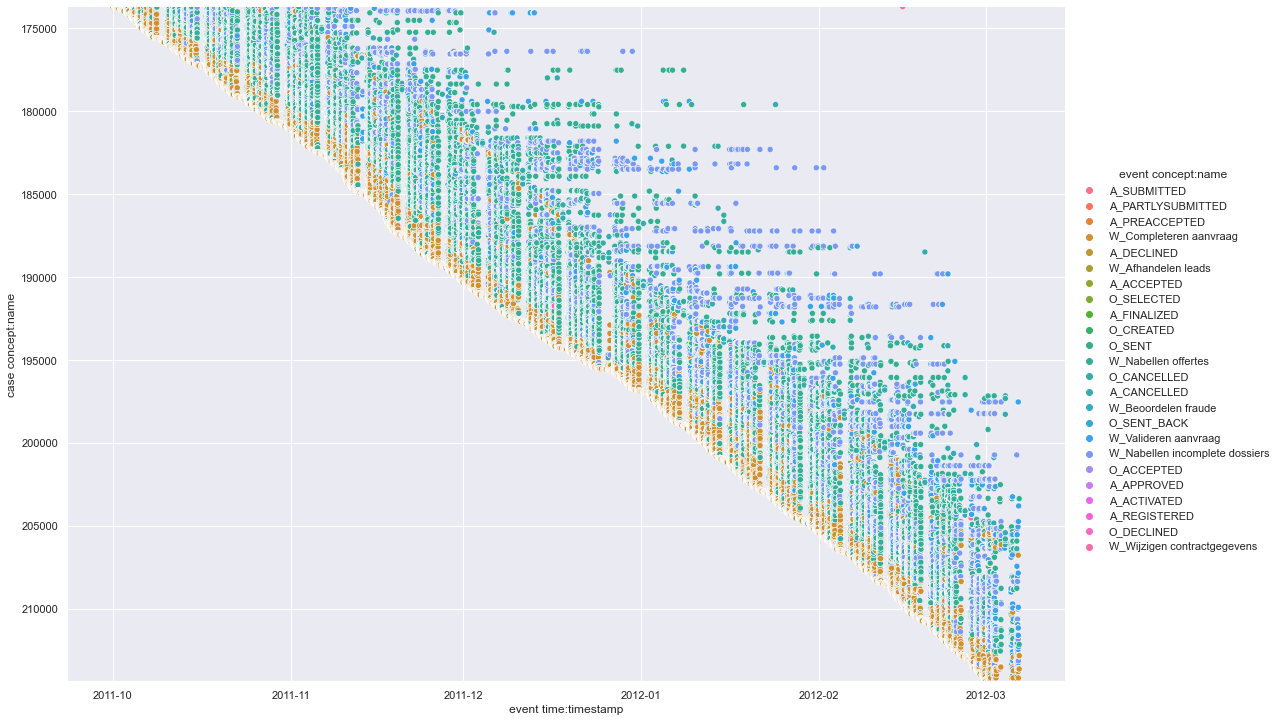

In [4]:
ax = sns.relplot(data=df_BPI, x='event time:timestamp', y='case concept:name', hue='event concept:name', height=10, aspect=1.5)

plt.ylim(max_case, min_case)
plt.show()


In [5]:
df_BPI['event time:case relative'] = pd.to_datetime(df_BPI['event time:timestamp'], format="%Y-%m-%d %H:%M:%S.%f") - pd.to_datetime(df_BPI['case REG_DATE'], format="%Y-%m-%d %H:%M:%S.%f")

for ind in df_BPI.index:
    df_BPI.at[ind, 'event time:case relative'] = df_BPI.at[ind, 'event time:case relative'].total_seconds()

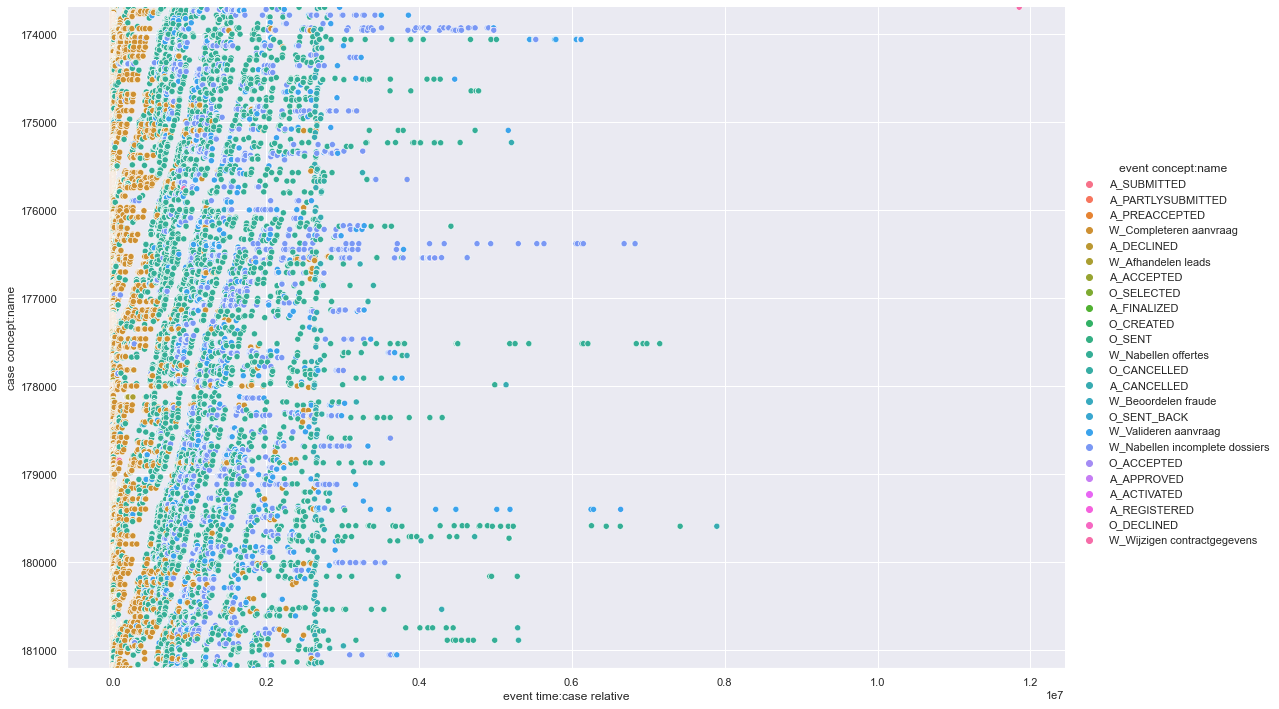

In [6]:
ax = sns.relplot(data=df_BPI, x='event time:case relative', y='case concept:name', hue='event concept:name', height=10, aspect=1.5)

plt.ylim(max_case_1m, min_case_1m)
plt.show()


In [ ]:
02-01-2012 15:28:39.244


In [7]:
def caseHasNextEvent(df, index):
    if index >= len(df) - 1:
        return False
    if df.loc[index, 'case concept:name'] == df.loc[index+1, 'case concept:name']:
        return True
    return False

In [8]:
df_BPI = df_BPI.sort_values(by=['case concept:name','event time:timestamp'], ignore_index=True)

for ind in df_BPI.index:
    if caseHasNextEvent(df_BPI, ind):
        df_BPI.at[ind, 'last event'] = False
    else:
        df_BPI.at[ind, 'last event'] = True

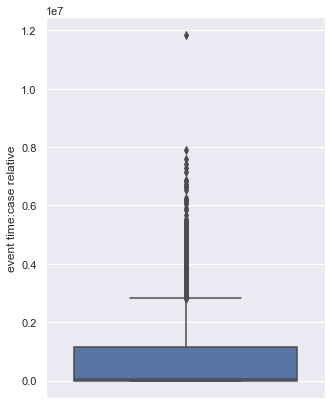

In [9]:
fig, ax = plt.subplots(figsize=(5, 7))
ax = sns.boxplot(data=df_BPI[df_BPI['last event']], y='event time:case relative')
plt.show()